# Data EDA(Exploratory Data Analysis)
- File name : FMCW_RADAR2022_dict_ver3.pkl
- Data : FMCW Radar
- Class : LFM, Barker, Costas, Frank, T1~T4, P1~P4

# Imports

In [33]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import random


# Load Dataset 

In [135]:
# Load the dataset ...
with open("FMCW_RADAR2022_dict_ver5.pkl",'rb') as f:
    Xd = pickle.load(f, encoding='latin1') # encoding 방식 추가해줘야 돌아감
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
X = []  
lbl = []
for mod in mods:
    for snr in snrs:
        X.append(Xd[(mod,snr)])
        for i in range(Xd[(mod,snr)].shape[0]):  lbl.append((mod,snr))
X = np.vstack(X)

print("data shape is {}".format(X.shape))
print("data shape is {}".format(X.shape))

data shape is (960, 2, 1024)
data shape is (960, 2, 1024)


In [136]:
snrs

[-20, -18, -16, -14, -12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10]

In [153]:
def plot_signal2(dataset,modname):

    snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], dataset.keys())))), [1,0])
    fig = plt.figure(figsize=(30,10))
    plt.rc('figure', titlesize=50)
    for i, snr in enumerate(reversed(snrs)):
        signal = dataset[modname,snr]
        idx = random.randint(0,4)
        signal_I = signal[idx][0]

        plt.subplot(4,4,i+1)
        plt.plot(signal_I)
        plt.ylabel("Amplitude")
        title_font ={
            'fontsize' : 16,
            "fontweight" : 'bold'
        }
        plt.title(modname+str(snr)+"dB",fontdict=title_font)
        plt.grid(True)
        plt.tight_layout()
        
    plt.show()
    fig.savefig('./images/'+modname+'.jpg')


# 1. Barker
### - In telecommunication technology, a Barker code, or Barker sequence, is a finite sequence of digital values with the ideal autocorrelation property. It is used as a synchronising pattern between sender and receiver.
### - code length = 13

## Time-domain Anaysis

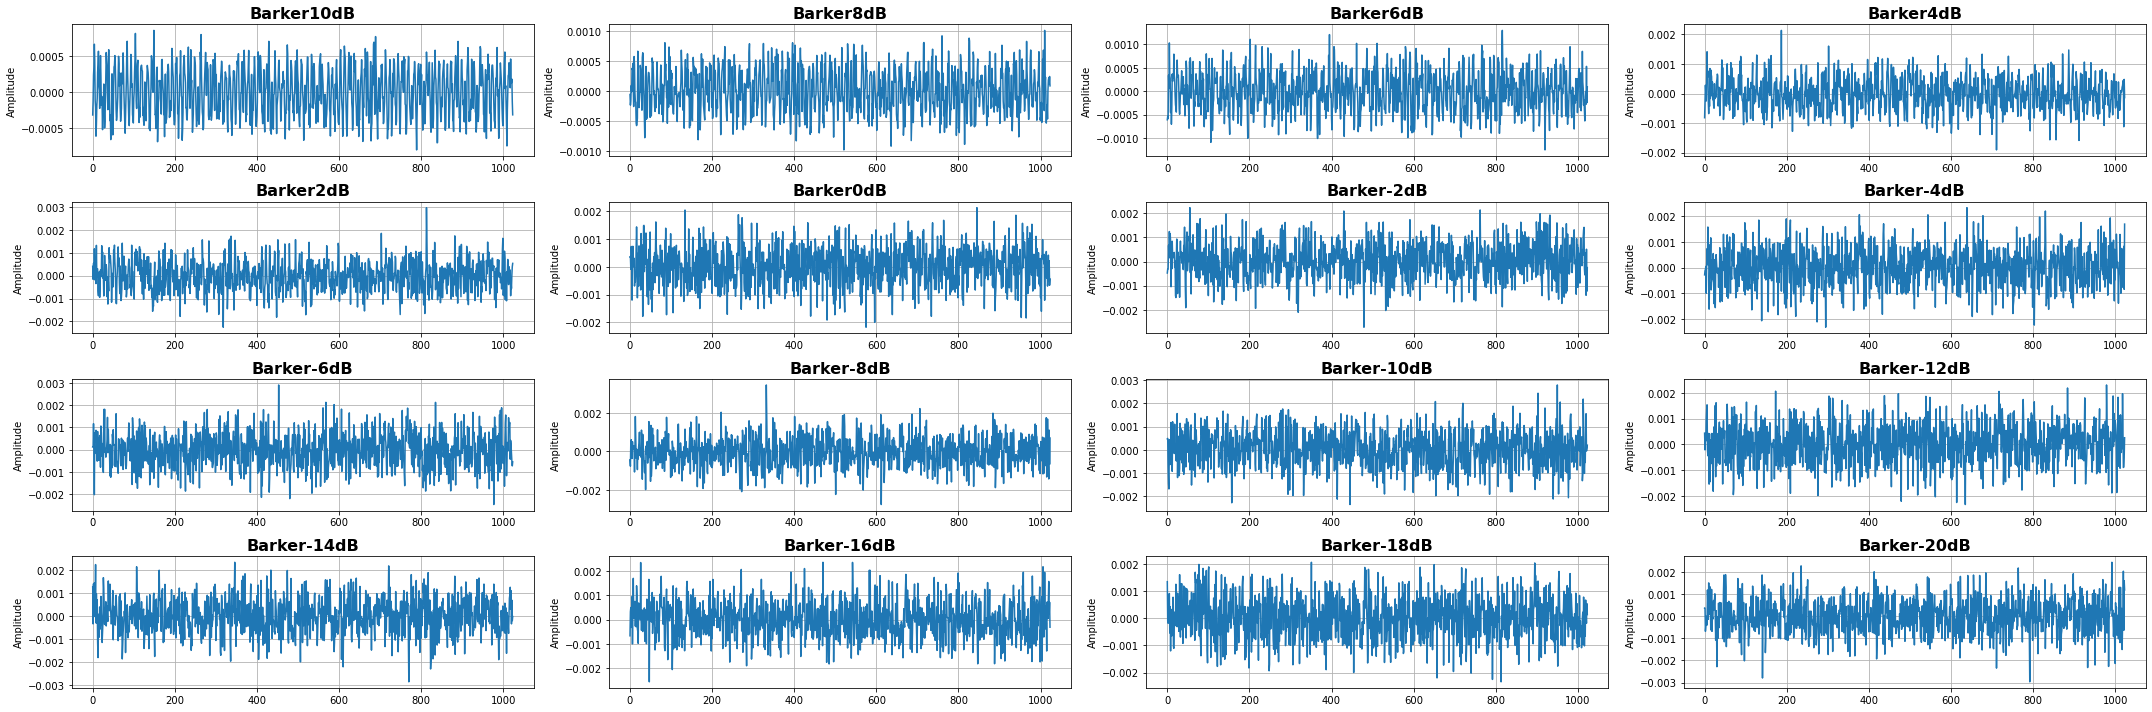

In [138]:
plot_signal2(Xd,'Barker')

## Time-Frequency domain Anaysis
### - Choi-William-Distribution(CWD)
<img src="https://user-images.githubusercontent.com/67635137/165794361-b4ac7850-4a00-4d7f-a7a3-744755f3766d.png">

# 2. LFM(Linear Frequency Modualtion)

### - A chirp is a signal in which the frequency increases (up-chirp) or decreases (down-chirp) with time. In some sources, the term chirp is used interchangeably with sweep signal.[1] It is commonly applied to sonar, radar, and laser systems, and to other applications, such as in spread-spectrum communications (see chirp spread spectrum). This signal type is biologically inspired and occurs as a phenomenon due to dispersion (a non-linear dependence between frequency and the propagation speed of the wave components). It is usually compensated for by using a matched filter, which can be part of the propagation channel. Depending on the specific performance measure, however, there are better techniques both for radar and communication. Since it was used in radar and space, it has been adopted also for communication standards. For automotive radar applications, it is usually called linear frequency modulated waveform (
### - https://kr.mathworks.com/help/phased/ug/linear-frequency-modulated-pulse-waveforms.html
### - parameters
### - center frequency
### - sensitivity

## Time-domain Anaysis

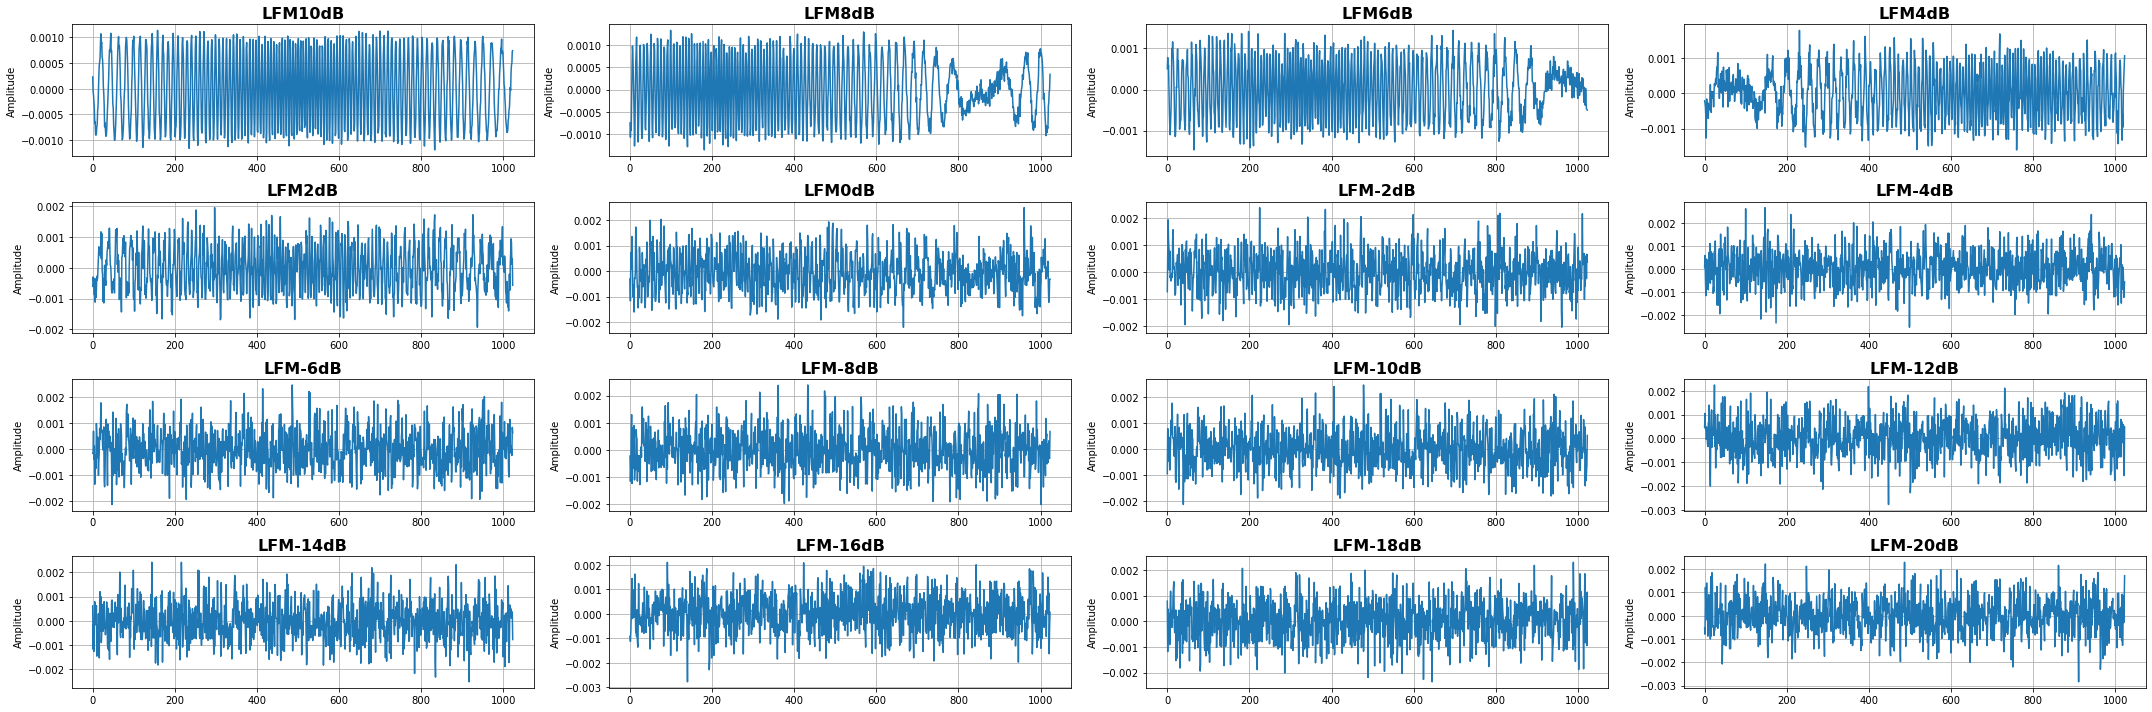

In [120]:
plot_signal2('LFM')

## Time-Frequency domain Anaysis
### - Choi-William-Distribution(CWD)
<img src="https://user-images.githubusercontent.com/67635137/165881514-56017962-63c9-4c11-8cad-30a50693a3b1.png">

# 3. Costas

### - Costas codes are a class of frequency-coded waveforms. A Costas code is a burst of contiguous uncoded pulse waveforms, each with a different frequency selected from a finite set of equally spaced frequencies that are processed coherently. 
### - parameters
### - prime_number=11
### - primitive_root=2

## Time-domain Anaysis

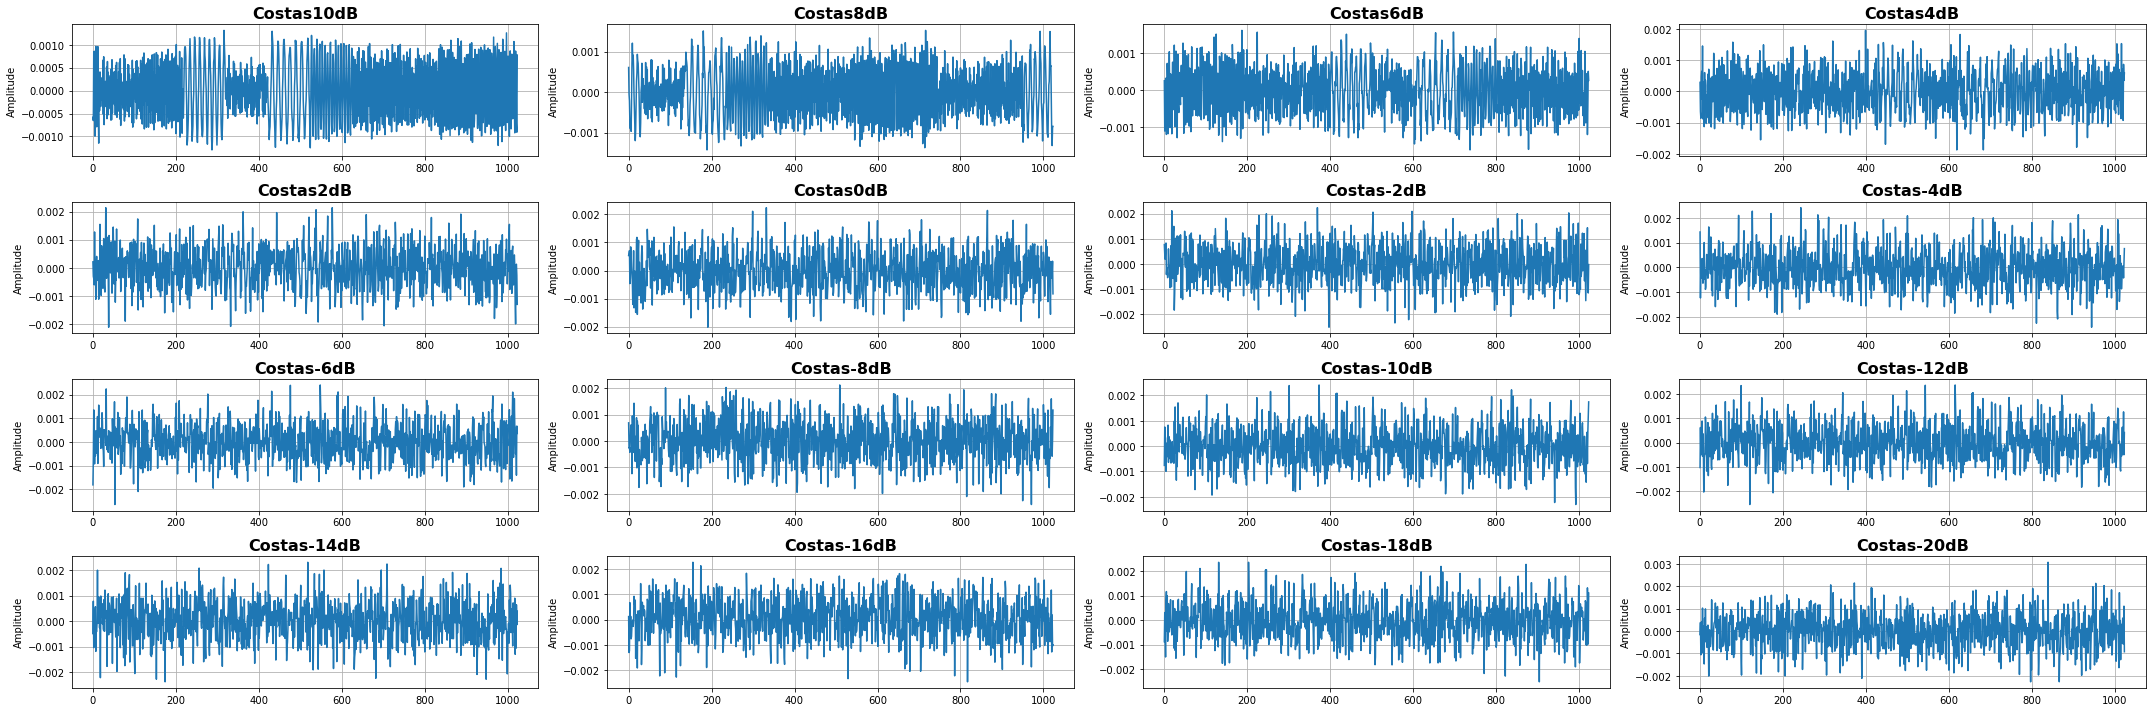

In [139]:
plot_signal2(Xd,'Costas')

## Time-Frequency domain Anaysis
## - Choi-William-Distribution(CWD)
<img src="https://user-images.githubusercontent.com/67635137/165795337-7cc590c5-8f8a-4eb9-bc8e-4b011831634d.png">

# 4. Frank

### - The Frank Code is a polyphase code modulation format used for pulse compression. It use harmonically related phases which are based on certain fundamental phase increments. This form of phase coding was developed by Robert L. Frank. 
### - https://www.radartutorial.eu/08.transmitters/Frank%20Code.en.html
### - parameters
### - code length = 13

## Time-domain Anaysis

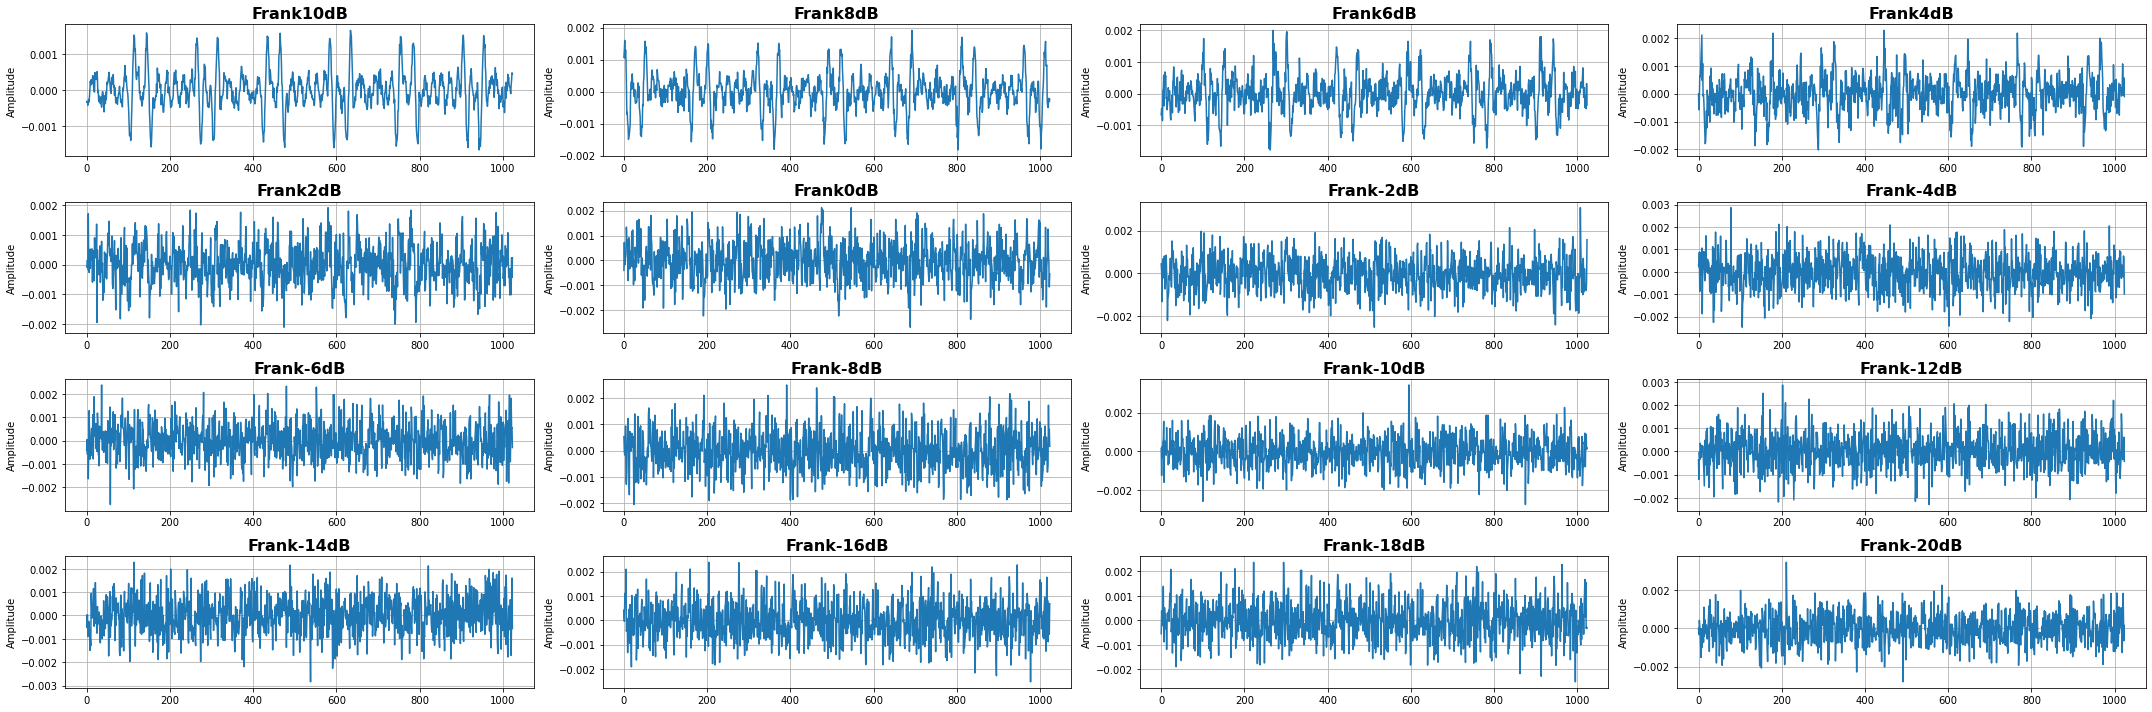

In [140]:
plot_signal2(Xd,'Frank')

## Time-Frequency domain Anaysis
## - Choi-William-Distribution(CWD)

<img src="https://user-images.githubusercontent.com/67635137/165882392-fa75ebe3-cf78-43f0-af5f-318724e07d94.png">

# 5. P1(Polyphase)

### - The P1 code is also generated using a step approximation to a linear frequency modulation waveform. In this code, M frequency steps and M samples per frequency are obtained from the waveform using a double sideband detection with the local oscillator at band center [15, 16]. The length of the resulting code or compression ratio is Nc = M^2. 
### - https://www.radartutorial.eu/08.transmitters/Frank%20Code.en.html
### - parameters
- code length = 16 (frequency step M=4)

## Time-domain Anaysis

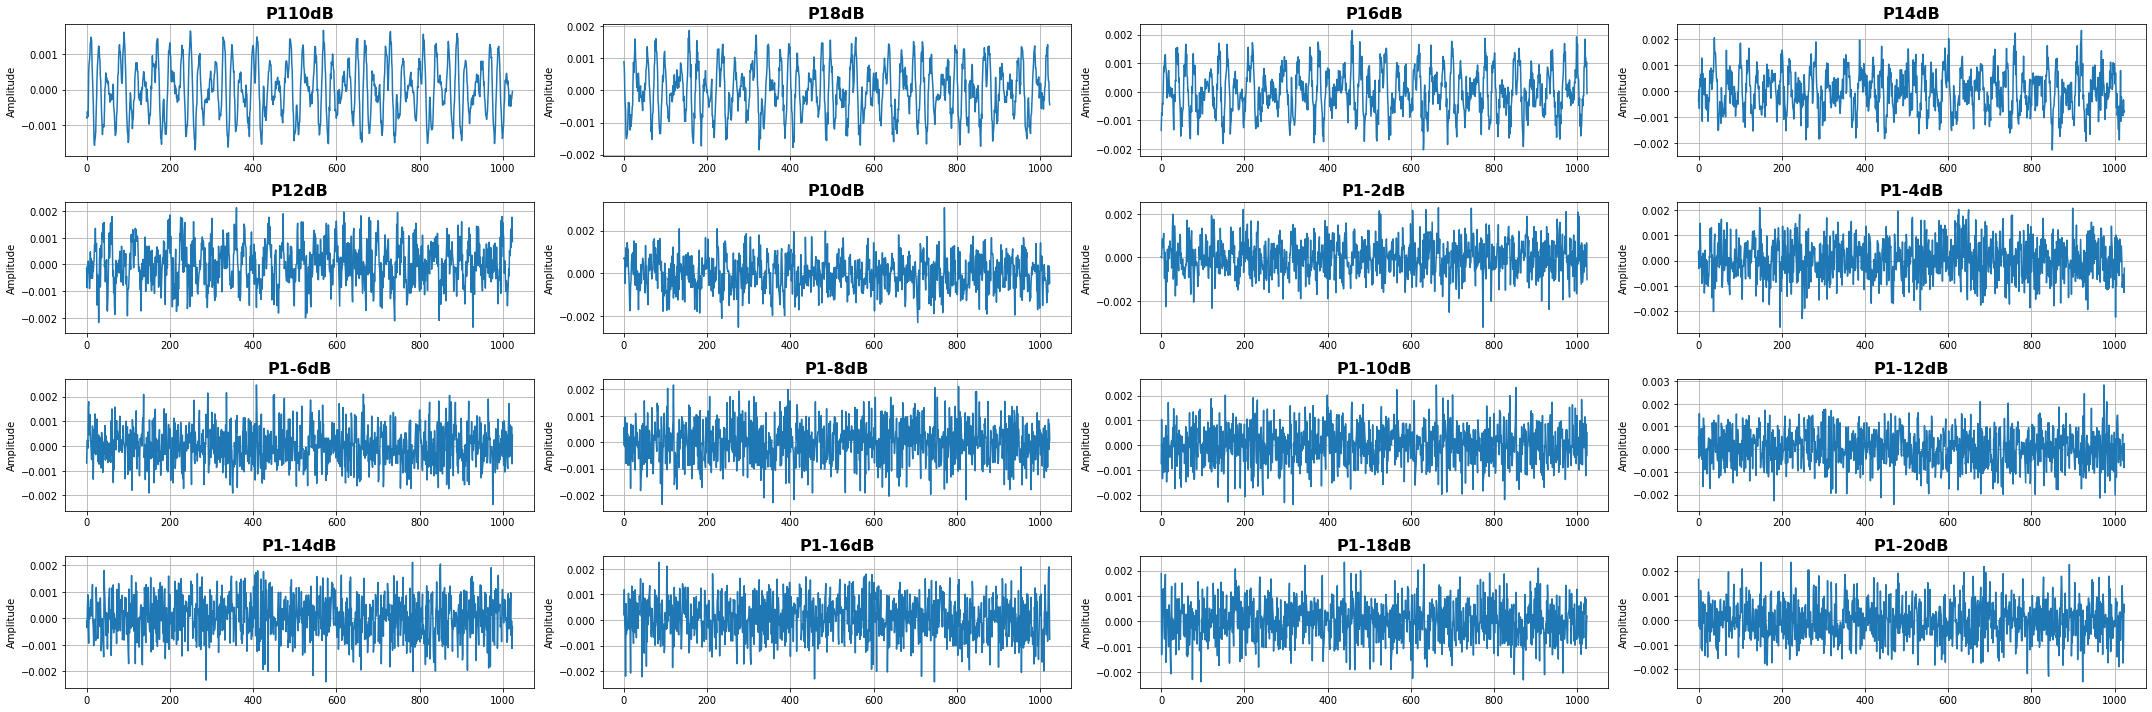

In [141]:
plot_signal2(Xd,'P1')

## Time-Frequency domain Anaysis
## - Choi-William-Distribution(CWD)
<img src="https://user-images.githubusercontent.com/67635137/165882571-eae38eb8-f966-4c4d-8762-8a26ad795bfa.png">

# 6. P2(Polyphase)

### - For the P2 code M even, the phase increment within each phase group is thesame as the P1 code, except that the starting phases are different [15]. The P2 code also has a length or compression ratio of Nc = M2. The P2 code is given by
### - parameters
- code length = 16 (frequency step M=4)

## Time-domain Anaysis

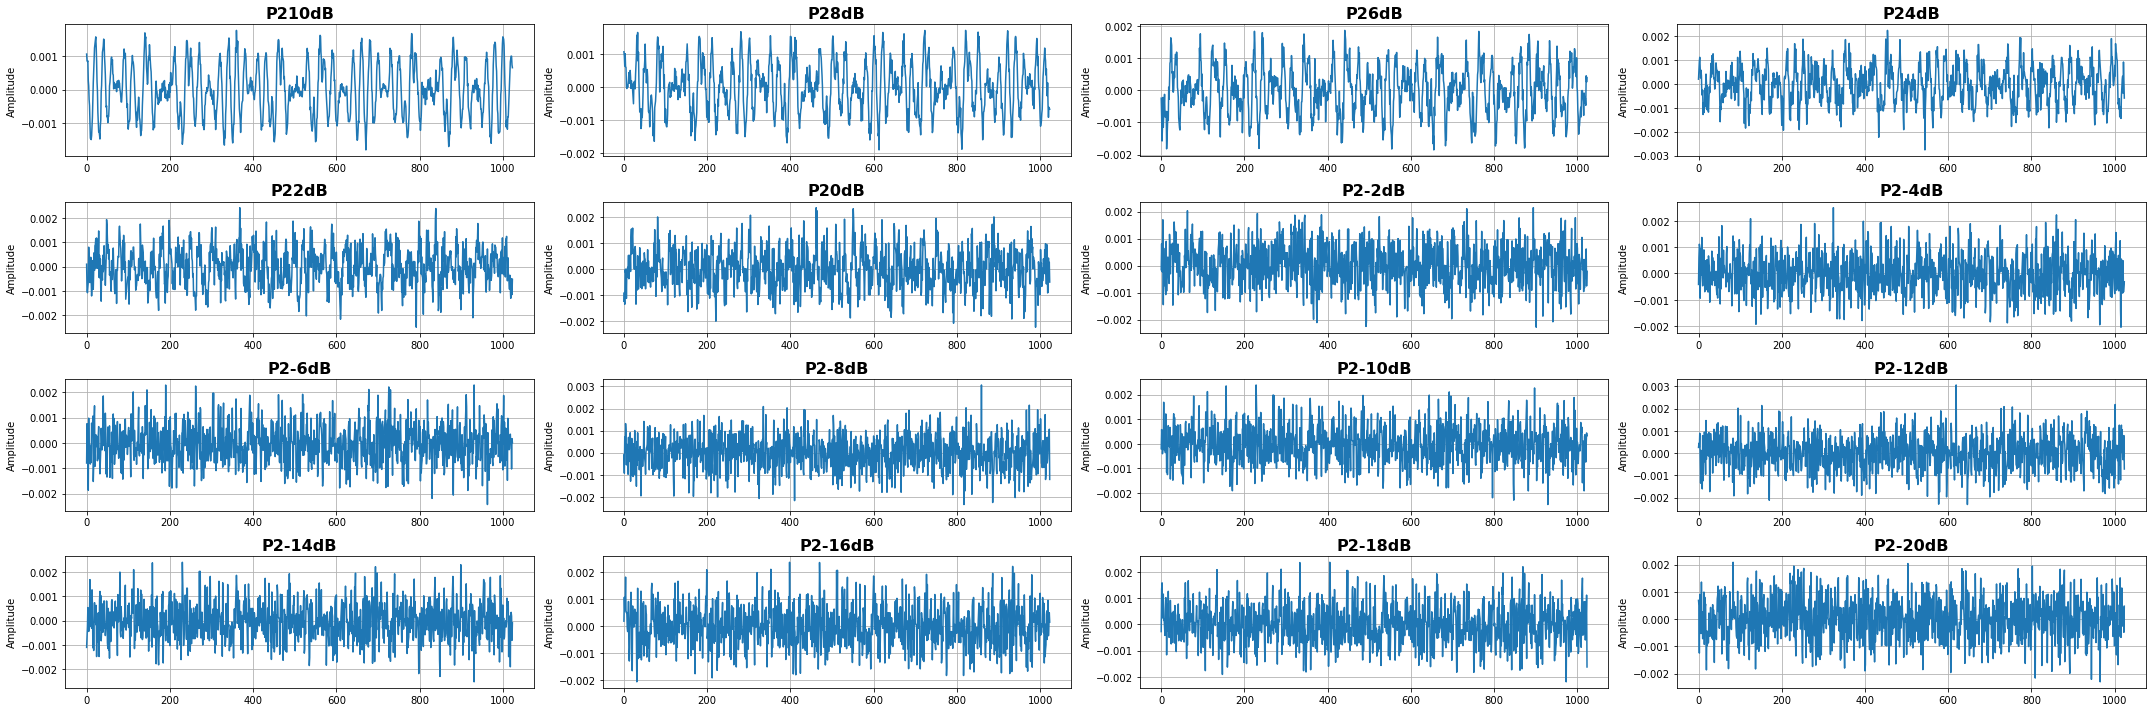

In [142]:
plot_signal2(Xd,'P2')

## Time-Frequency domain Anaysis
## - Choi-William-Distribution(CWD)
<img src="https://user-images.githubusercontent.com/67635137/165883097-2ae12ada-f143-4057-83b6-ab5a55b1a68b.png">

# 7. P3(Polyphase)

### - For the P2 code M even, the phase increment within each phase group is thesame as the P1 code, except that the starting phases are different [15]. The P2 code also has a length or compression ratio of Nc = M2. The P2 code is given by
### - parameters
- code length = 16 (frequency step M=4)

## Time-domain Anaysis

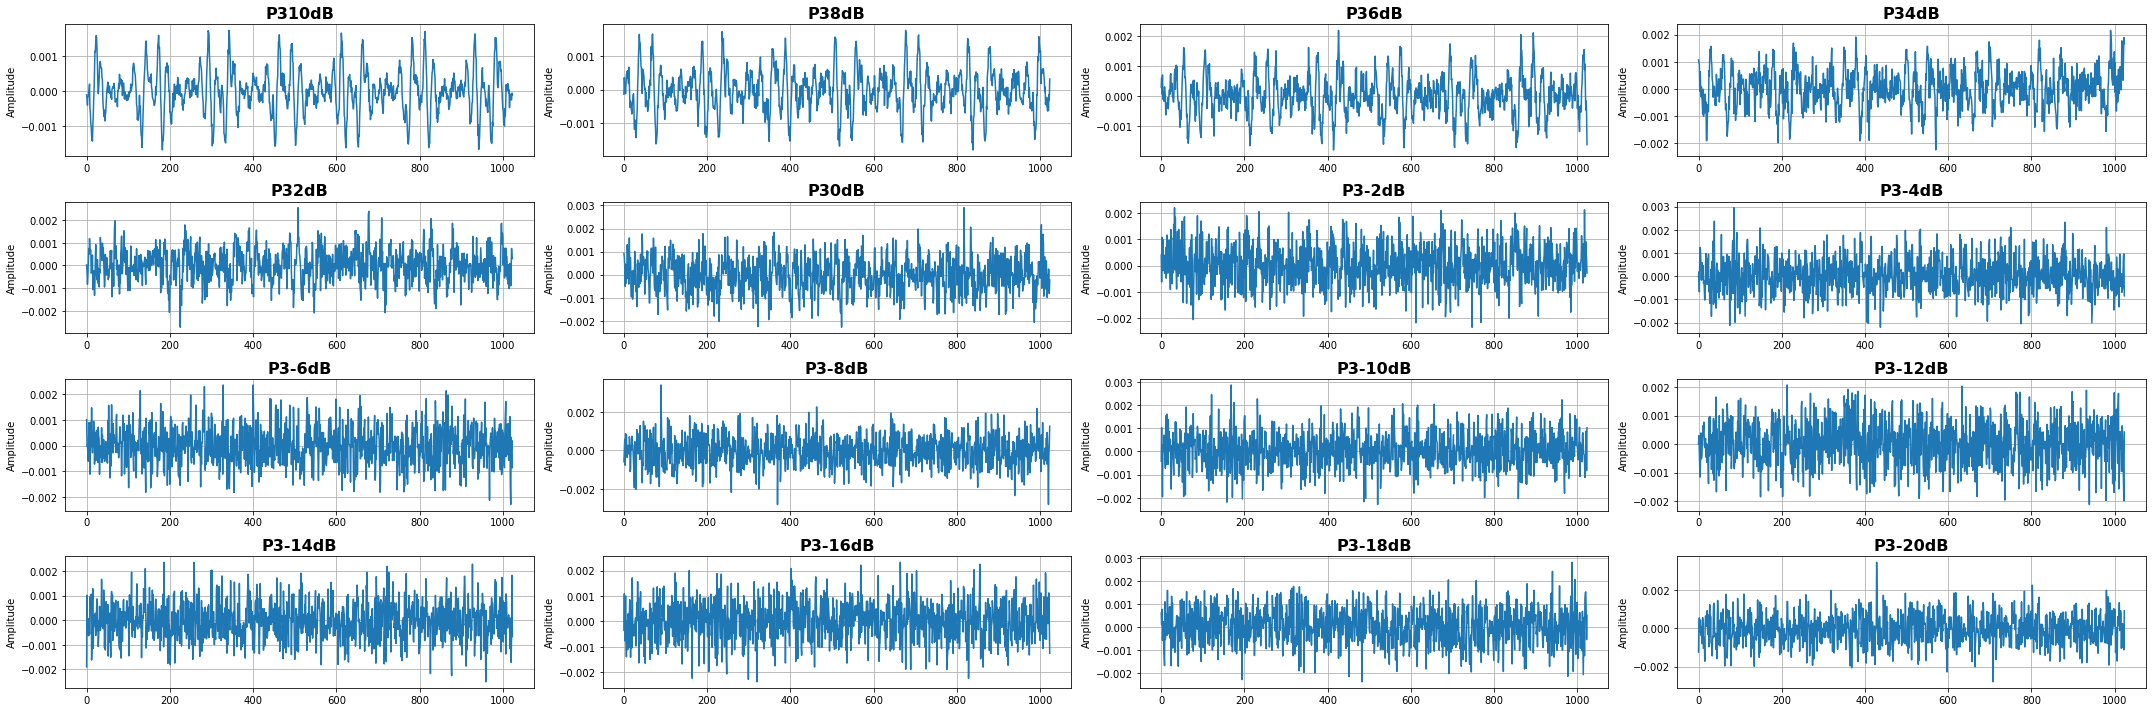

In [143]:
plot_signal2(Xd,'P3')

## Time-Frequency domain Anaysis
## - Choi-William-Distribution(CWD)
<img src="https://user-images.githubusercontent.com/67635137/165883692-f764a107-1c27-4fa1-88e4-8ad94a426da2.png">

# 8. P4(Polyphase)

### - For the P2 code M even, the phase increment within each phase group is thesame as the P1 code, except that the starting phases are different [15]. The P2 code also has a length or compression ratio of Nc = M2. The P2 code is given by
### - parameters
- code length = 16 (frequency step M=4)

## Time-domain Anaysis

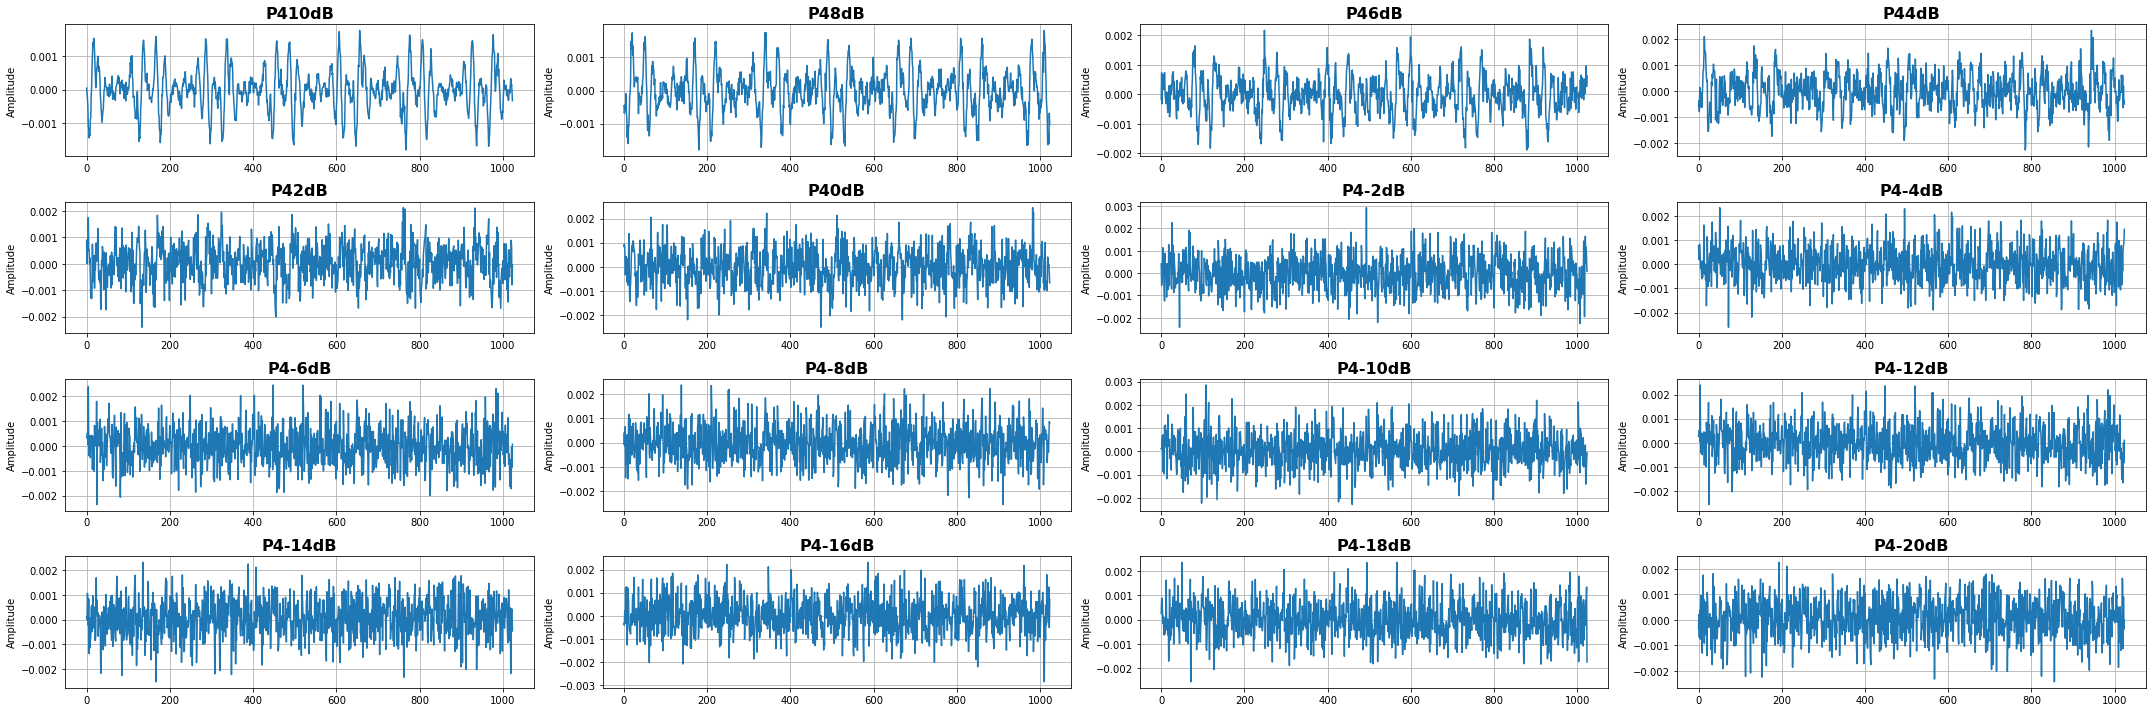

In [144]:
plot_signal2(Xd,'P4')

## Time-Frequency domain Anaysis
## - Choi-William-Distribution(CWD)
<img src="https://user-images.githubusercontent.com/67635137/165883721-c9873da3-1018-4d74-8ab0-10c0385cae90.png">

# 9. T1(Polytime)

### -The T1(n) sequence is generated using the stepped frequency waveform that is zero beat at the leading segment
### - parameters
- K(Number of Segment) : 4
- n(phase state) : 2
- Modulation bandwidth(delta f)

## Time-domain Anaysis

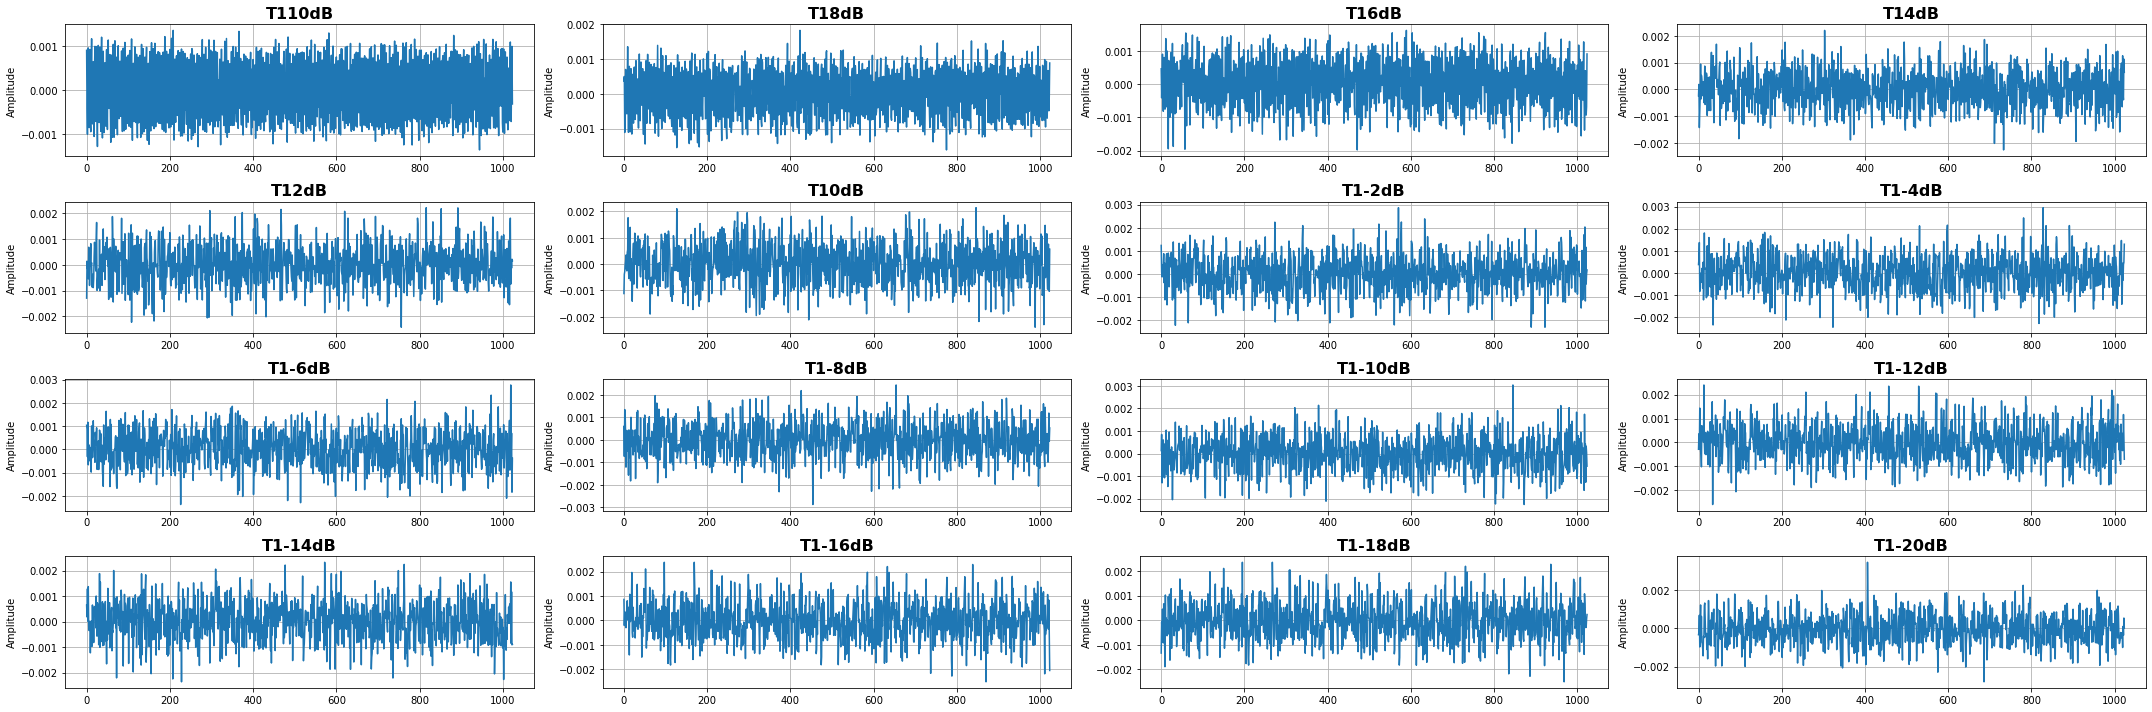

In [146]:
plot_signal2(Xd,'T1')

## Time-Frequency domain Anaysis
## - Choi-William-Distribution(CWD)
<img src="https://user-images.githubusercontent.com/67635137/165884099-5bf3e4aa-de7e-4cdc-b807-93fdbfb0fb3f.png">


# 10. T2(Polytime)
### - description
### - parameters
- K(Number of Segment) : 4
- n(phase state) : 2
- Modulation bandwidth(delta f)

## Time-domain Anaysis

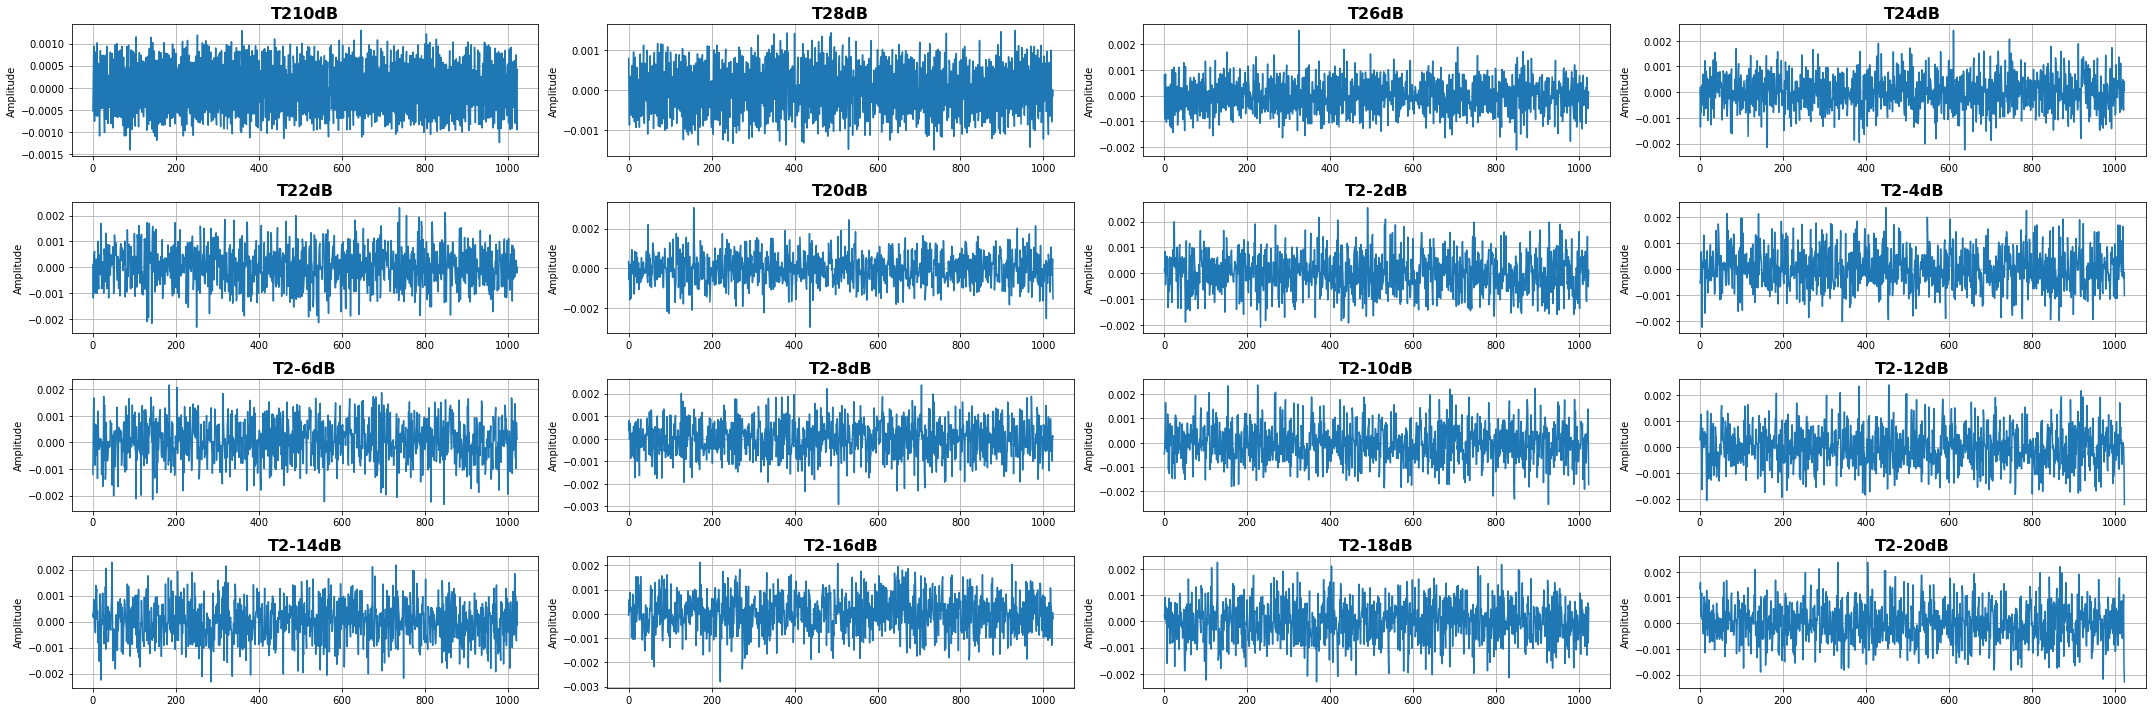

In [147]:
plot_signal2(Xd,'T2')

## Time-Frequency domain Anaysis
### - Choi-William-Distribution(CWD)
<img src="https://user-images.githubusercontent.com/67635137/165884220-27659104-6043-47ec-8fa4-8e7599276ebb.png">

# 11. T3(Polytime)
### - description
### - parameters
- K(Number of Segment) : 4
- n(phase state) : 2
- Modulation bandwidth(delta f)

## Time-domain Anaysis

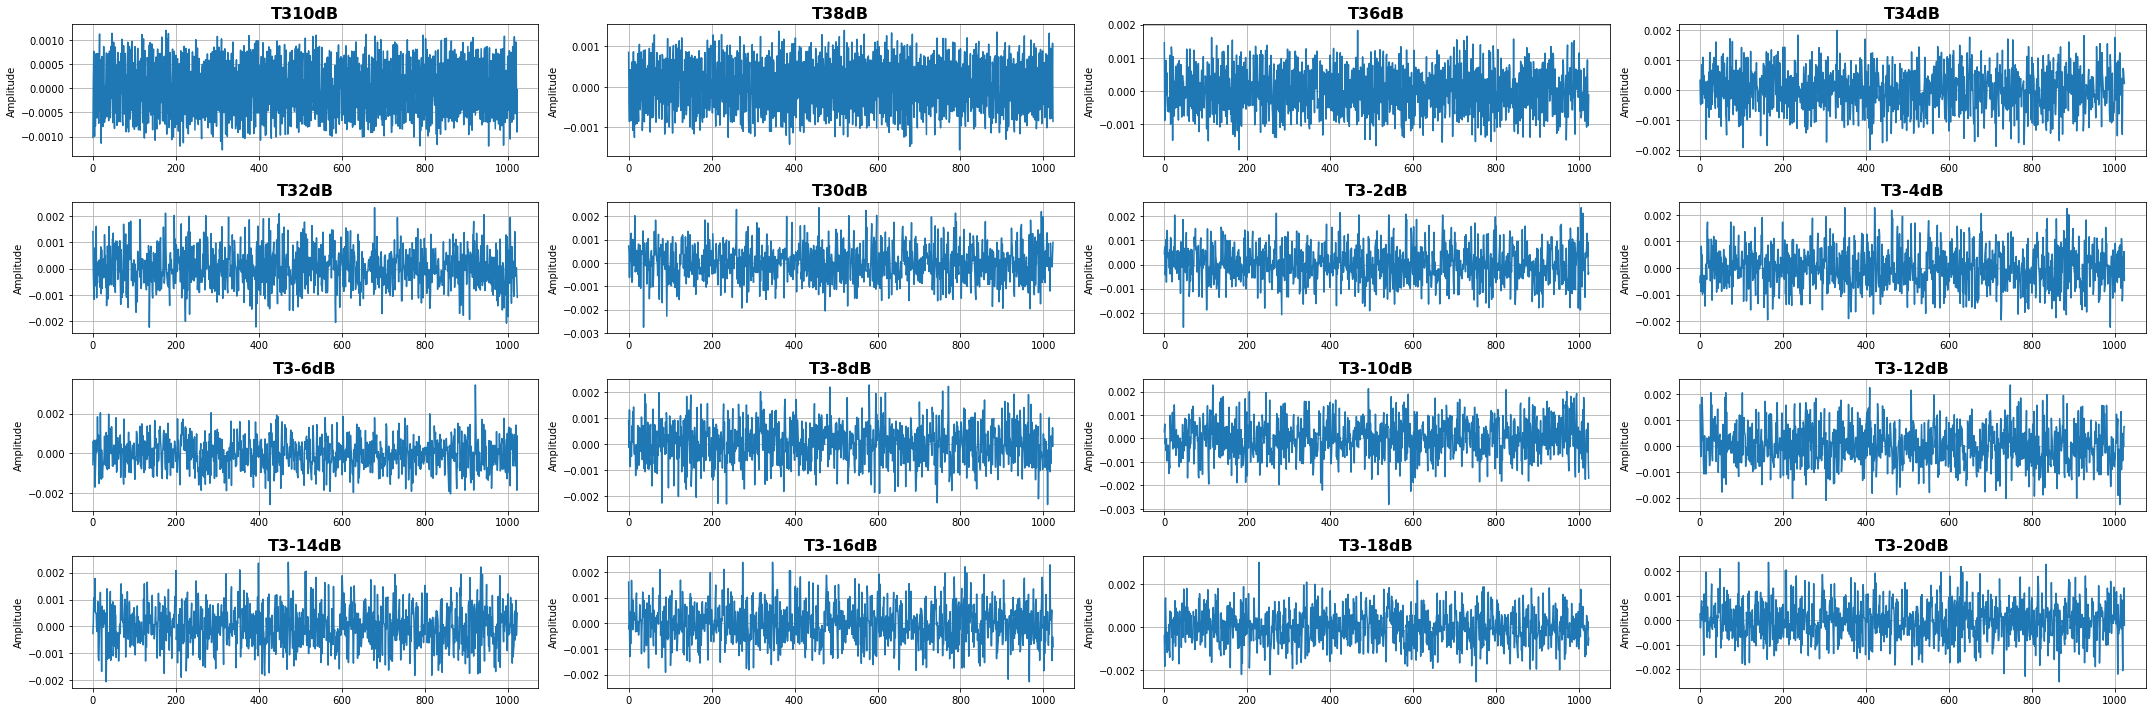

In [148]:
plot_signal2(Xd,'T3')

## Time-Frequency domain Anaysis
### - Choi-William-Distribution(CWD)
<img src="https://user-images.githubusercontent.com/67635137/165884252-9b9be21c-7769-4107-96d1-5cbe21c27dc5.png">

# 12. T4(Polytime)
### - description
### - parameters
- K(Number of Segment) : 4
- n(phase state) : 2
- Modulation bandwidth(delta f)

## Time-domain Anaysis

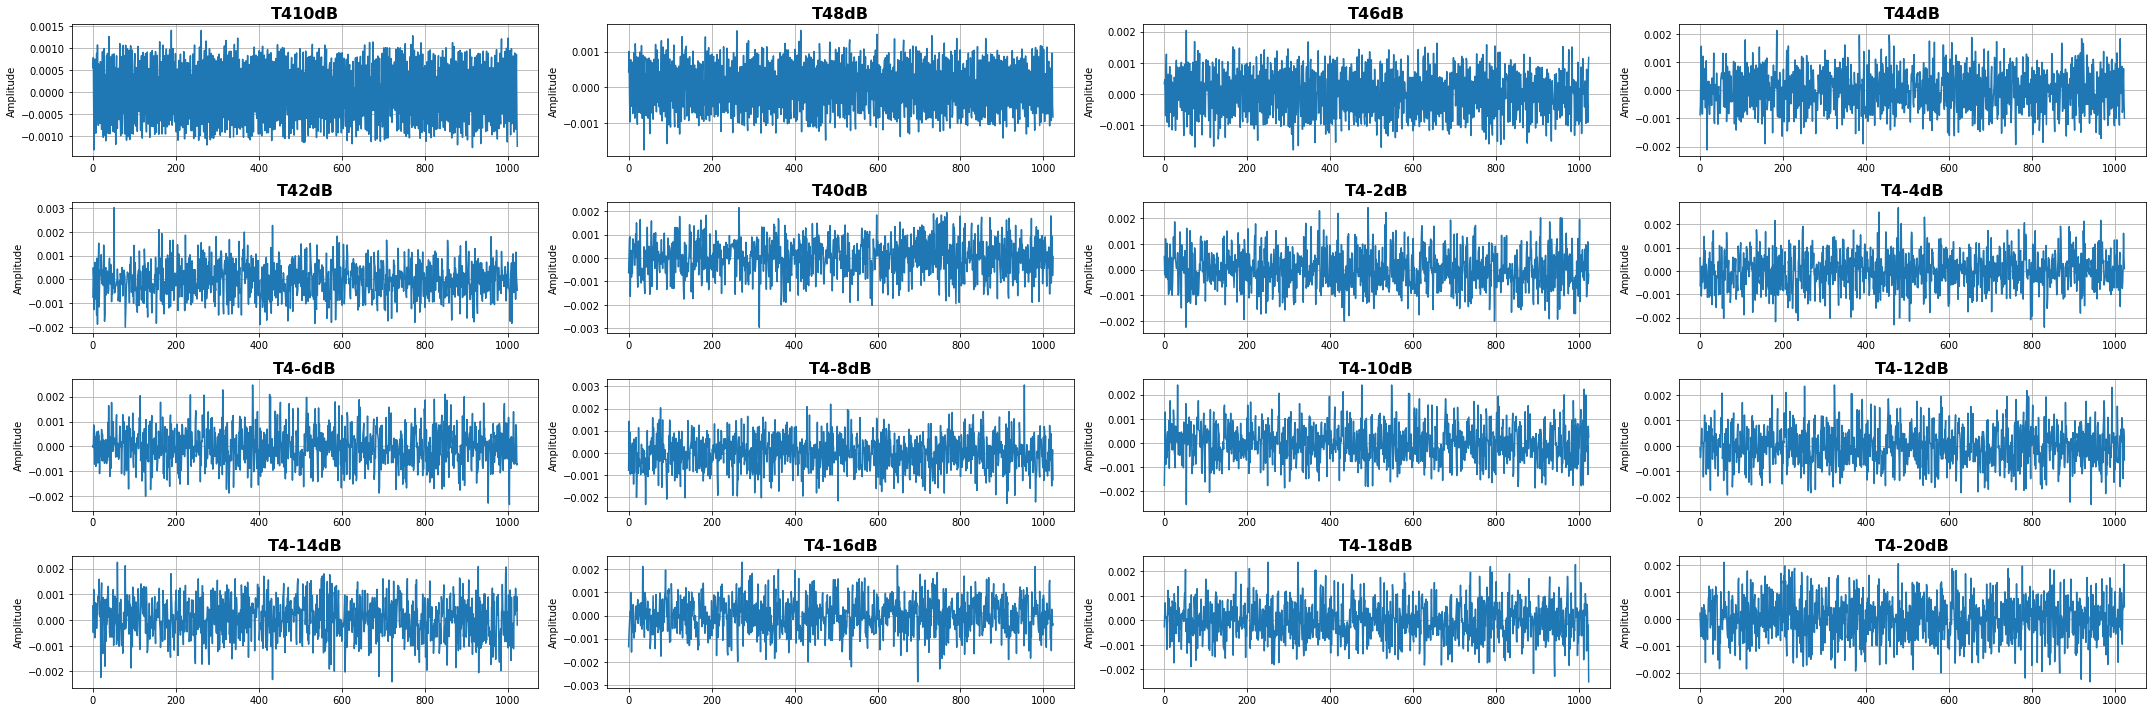

In [150]:
plot_signal2(Xd,'T4')

## Time-Frequency domain Anaysis
### - Choi-William-Distribution(CWD)
<img src="https://user-images.githubusercontent.com/67635137/165884383-5e81d4fe-cae8-4fbf-85b8-a824d0c163c2.png">

# Real data Analysis
## Same parameter as simulation data
## FIle name : FMCW_WIRE_Radar_2022_ver5 (Dc blocked)

- Number of waveforms : 12 ​

- Waveform types : Barker,LFM,Costas,Frank,Polytime(4),Polyphase(4)​

- SNR : 0~ 10 dB (interval : 2dB)​

- Center frequency : 910Mhz​

- Tx/Rx gain = 0​

- Tx_Sampling Rate : 2MHz​

- Rx_Sampling Rate : 2Mhz​

- Channel : Wire (SMA Cable, Attenuator –30dB)​

- Samples per SNR : 5​

- total samples : 360

In [154]:
# Load the dataset ...
with open("FMCW_WIRE_RADAR2022_dict_ver5.pkl",'rb') as f:
    Xd_wire = pickle.load(f, encoding='latin1') # encoding 방식 추가해줘야 돌아감
snrs_wire,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd_wire.keys())))), [1,0])
X_wire = []  
lbl = []
for mod in mods:
    for snr in snrs_wire:
        X_wire.append(Xd_wire[(mod,snr)])
        for i in range(Xd_wire[(mod,snr)].shape[0]):  lbl.append((mod,snr))
X_wire = np.vstack(X_wire)

print("data shape is {}".format(X_wire.shape))

data shape is (360, 2, 1024)


# LFM

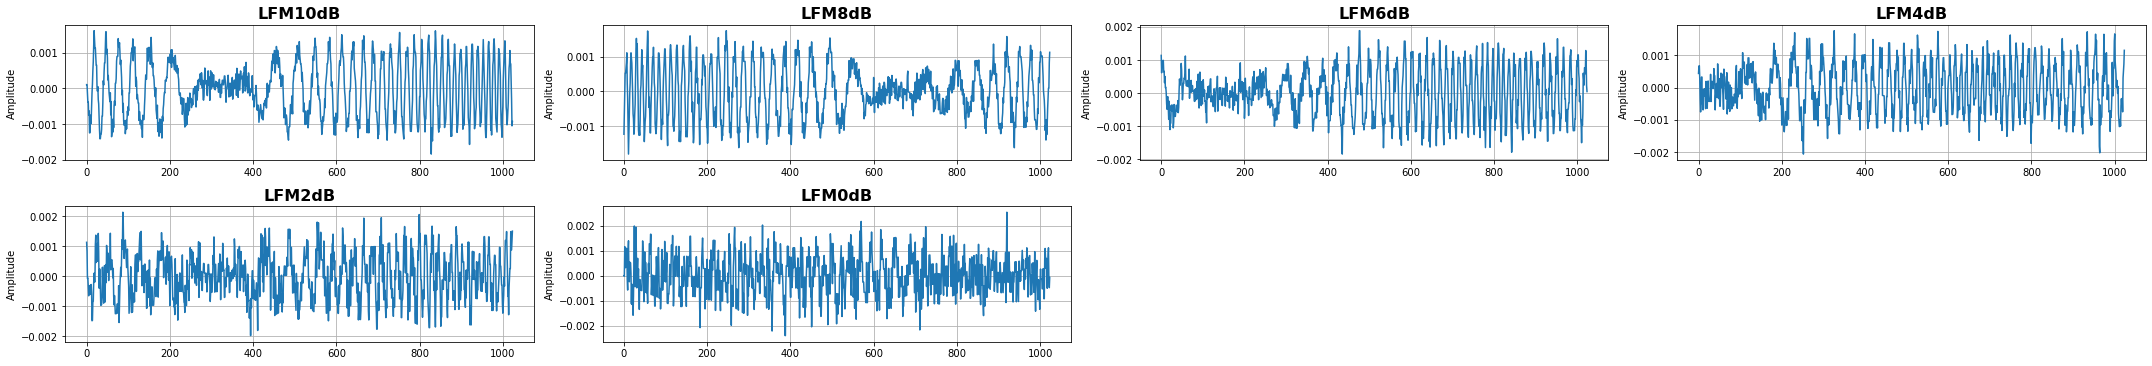

In [157]:
plot_signal2(Xd_wire,'LFM')


<img src = "https://user-images.githubusercontent.com/67635137/165887640-eec3da5a-a13b-42cf-abbd-156d04de4c4b.png">